In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import openpyxl
import datetime
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('max_columns',1000)   ####最多显示1000列
pd.set_option('max_row',30)    ####最多显示30行
pd.set_option('display.float_format', lambda x: '%.5f' % x)  ####最多显示5位小数
%matplotlib inline
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'

In [2]:
###导入wind模块
from WindPy import *
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
####输入策略建立日期字符
strategy_build_data = input('策略建立日期year-mm-dd:')

策略建立日期year-mm-dd:2020-03-30


In [4]:
type(strategy_build_data)

str

In [5]:
###将输入字符转化为日期
startdate=datetime.strptime(strategy_build_data,'%Y-%m-%d')
startdate

#date1 = datetime.datetime.strptime(datestr1, '%Y-%m-%d')这里是从网上看的，其实复制重复了，只要一个datetime

datetime.datetime(2020, 3, 30, 0, 0)

In [6]:
###利用wind代码生成器，计算出求所有可转债的代码的表达如下： w.wset("sectorconstituent","date=2020-02-09;sectorid=a101020600000000")
_,mixcode=w.wset("sectorconstituent","date="+str(startdate)+";sectorid=a101020600000000;field=wind_code,sec_name",usedf=True)
mixcode  ###！！！注意，此时mixcode是包括退市的债券，也包括非沪深交易所上市的债券，都需要剔除

,wind_code,sec_name
1,110031.SH,航信转债
2,110033.SH,国贸转债
3,110034.SH,九州转债
4,110038.SH,济川转债
5,110041.SH,蒙电转债
...,...,...
251,128100.SZ,搜特转债
252,128101.SZ,联创转债
253,128102.SZ,海大转债
254,128103.SZ,同德转债


In [7]:
###对数据进行清洗，只选取'wind_code'字符串中含有SH、或者SZ（即只需要沪深股票）
mixcode=mixcode[mixcode['wind_code'].str.contains('SH'or 'SZ')]
mixcode

,wind_code,sec_name
1,110031.SH,航信转债
2,110033.SH,国贸转债
3,110034.SH,九州转债
4,110038.SH,济川转债
5,110041.SH,蒙电转债
...,...,...
107,113570.SH,百达转债
108,113571.SH,博特转债
109,113572.SH,三祥转债
110,113574.SH,华体转债


In [8]:
###继续清洗数据，选取‘sec_name'不包括‘退市’的转债
mixcode2=mixcode[mixcode['sec_name'].str.contains('退市')==False]
mixcode2

,wind_code,sec_name
1,110031.SH,航信转债
2,110033.SH,国贸转债
3,110034.SH,九州转债
4,110038.SH,济川转债
5,110041.SH,蒙电转债
...,...,...
107,113570.SH,百达转债
108,113571.SH,博特转债
109,113572.SH,三祥转债
110,113574.SH,华体转债


In [9]:
###将DataFrame的数据转换成list
clean_code=mixcode2['wind_code'].values.tolist()
clean_code

['110031.SH',
 '110033.SH',
 '110034.SH',
 '110038.SH',
 '110041.SH',
 '110042.SH',
 '110043.SH',
 '110044.SH',
 '110045.SH',
 '110047.SH',
 '110048.SH',
 '110050.SH',
 '110051.SH',
 '110052.SH',
 '110053.SH',
 '110055.SH',
 '110056.SH',
 '110057.SH',
 '110058.SH',
 '110059.SH',
 '110060.SH',
 '110061.SH',
 '110062.SH',
 '110063.SH',
 '110064.SH',
 '110065.SH',
 '110066.SH',
 '110067.SH',
 '110068.SH',
 '113008.SH',
 '113009.SH',
 '113011.SH',
 '113012.SH',
 '113013.SH',
 '113014.SH',
 '113016.SH',
 '113017.SH',
 '113019.SH',
 '113020.SH',
 '113021.SH',
 '113022.SH',
 '113024.SH',
 '113025.SH',
 '113026.SH',
 '113027.SH',
 '113028.SH',
 '113029.SH',
 '113030.SH',
 '113031.SH',
 '113032.SH',
 '113033.SH',
 '113502.SH',
 '113503.SH',
 '113504.SH',
 '113505.SH',
 '113508.SH',
 '113509.SH',
 '113511.SH',
 '113514.SH',
 '113515.SH',
 '113516.SH',
 '113517.SH',
 '113518.SH',
 '113519.SH',
 '113520.SH',
 '113521.SH',
 '113524.SH',
 '113525.SH',
 '113526.SH',
 '113527.SH',
 '113528.SH',
 '1135

In [34]:
###_,WindData的形式，是去除格式，将净数据提出，最后最末尾也有数据
_,WindData=w.wss(clean_code,"windcode,sec_name,carrydate,repo_lastestdate,amount,ptmyear,close,issueamount,outstandingbalance,amt,accrueddays,accruedinterest,curyield,ytm_cb,strbvalue,strbpremiumratio,strbpremium,convprice,convratio,convvalue,convpremium,convpremiumratio,cb_list_rationvol,underlyingname,underlyingcode,underlyingpe,growth_cagr_netprofit","tradeDate=20200205;priceAdj=U;cycle=D;unit=1;year=2018;n=3",usedf=True)

In [35]:
WindData

,WINDCODE,SEC_NAME,CARRYDATE,REPO_LASTESTDATE,AMOUNT,PTMYEAR,CLOSE,ISSUEAMOUNT,OUTSTANDINGBALANCE,AMT,ACCRUEDDAYS,ACCRUEDINTEREST,CURYIELD,YTM_CB,STRBVALUE,STRBPREMIUMRATIO,STRBPREMIUM,CONVPRICE,CONVRATIO,CONVVALUE,CONVPREMIUM,CONVPREMIUMRATIO,CB_LIST_RATIONVOL,UNDERLYINGNAME,UNDERLYINGCODE,UNDERLYINGPE,GROWTH_CAGR_NETPROFIT
110031.SH,110031.SH,航信转债,2015-06-12,2020-03-30,AAA,1.34973,122.31780,2400000000.00000,23.98922,6041986.00000,239.00000,0.98219,1.21650,-9.11770,104.31260,18.20240,18.98740,21.79000,4.58926,99.81640,23.48360,23.52680,19319730.00000,航天信息,600271.SH,21.22582,1.33941
110033.SH,110033.SH,国贸转债,2016-01-05,2020-03-30,AAA,1.91530,111.82100,2800000000.00000,12.11722,6010078.00000,32.00000,0.14904,1.51830,-1.08030,103.56460,8.11610,8.40540,7.42000,13.47709,85.71430,26.25570,30.63160,14500450.00000,厦门国贸,600755.SH,5.09384,49.92145
110034.SH,110034.SH,九州转债,2016-01-15,2020-03-30,AA+,1.94262,115.80360,1500000000.00000,14.99296,35822961.00000,22.00000,0.09644,1.38050,-2.85320,103.18970,12.31740,12.71030,18.32000,5.45852,92.57640,23.32360,25.19390,9149850.00000,九州通,600998.SH,20.05655,24.50862
110038.SH,110038.SH,济川转债,2017-11-13,2020-03-30,AA,2.77049,109.95370,843160000.00000,6.30888,27232864.00000,85.00000,0.18630,0.72630,-0.61210,98.48960,11.82910,11.65040,38.81000,2.57666,67.68880,42.45120,62.71520,1278710.00000,济川药业,600566.SH,12.70763,34.96378
110041.SH,110041.SH,蒙电转债,2017-12-22,2020-03-30,AAA,3.87705,115.85400,1875220000.00000,18.73028,17622203.00000,46.00000,0.12603,0.86220,-1.30940,97.19140,19.33150,18.78860,2.82000,35.46099,95.74470,20.23530,21.13460,697600.00000,内蒙华电,600863.SH,12.49243,3.83286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113570.SH,113570.SH,百达转债,2020-03-11,1899-12-30,A+,6.00000,nan,280000000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1298270.00000,百达精工,603331.SH,25.35211,25.48133
113571.SH,113571.SH,博特转债,2020-03-12,1899-12-30,AA-,6.00000,nan,696800000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2813110.00000,苏博特,603916.SH,15.72335,16.13288
113572.SH,113572.SH,三祥转债,2020-03-12,1899-12-30,A+,6.00000,nan,205000000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1075400.00000,三祥新材,603663.SH,28.47942,30.86946
113574.SH,113574.SH,华体转债,2020-03-31,1899-12-30,A+,6.00000,nan,208800000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,华体科技,603679.SH,41.56265,18.34843


In [12]:
WindData.to_excel(r"WindOriginalData.xlsx", sheet_name='WindOriginalData')

In [13]:
###对数据进行清洗，规范
#1、将列的英文名称换成中文名称。（最简单的应该是全部重命名，但不知什么原因顺序混乱，因此才使用该方式）
WindData_rename=WindData.rename(
    columns={
        'WINDCODE': '证券代码',
        'SEC_NAME': '证券简称',
        'CARRYDATE': '发行日期',
        'REPO_LASTESTDATE': '最新交易日期',
        'AMOUNT': '最新债项评级',
        'PTMYEAR': '剩余期限（年）',
        'CLOSE': '收盘价（元）',
        'ISSUEAMOUNT': '发行总额',
        'OUTSTANDINGBALANCE': '债券余额（亿元）',
        'AMT': '当日成交额',
        'ACCRUEDDAYS': '已计息天数',
        'ACCRUEDINTEREST': '应计利息',
        'CURYIELD': '当期收益率（%）',
        'YTM_CB': '纯债到期收益率（%）',
        'STRBVALUE': '纯债价值',
        'STRBPREMIUMRATIO': '纯债溢价率（%）',
        'STRBPREMIUM': '纯债溢价',
        'CONVPRICE': '转股价',
        'CONVRATIO': '转股比例',
        'CONVVALUE': '转换价值',
        'CONVPREMIUM': '转股溢价',
        'CONVPREMIUMRATIO': '转股溢价率（%）',
        'CB_LIST_RATIONVOL': '向老股东配售数量',
        'UNDERLYINGNAME': '正股简称',
        'UNDERLYINGCODE': '正股代码',
        'UNDERLYINGPE': '正股市盈率',
        'GROWTH_CAGR_NETPROFIT': '正股盈利过去3年复合增长率（%）',
    })
WindData_rename

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额,债券余额（亿元）,当日成交额,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）
110031.SH,110031.SH,航信转债,2015-06-12,2020-03-30,AAA,1.34973,122.31780,2400000000.00000,23.98922,6041986.00000,239.00000,0.98219,1.21650,-9.11770,104.31260,18.20240,18.98740,21.79000,4.58926,99.81640,23.48360,23.52680,19319730.00000,航天信息,600271.SH,21.22582,1.33941
110033.SH,110033.SH,国贸转债,2016-01-05,2020-03-30,AAA,1.91530,111.82100,2800000000.00000,12.11722,6010078.00000,32.00000,0.14904,1.51830,-1.08030,103.56460,8.11610,8.40540,7.42000,13.47709,85.71430,26.25570,30.63160,14500450.00000,厦门国贸,600755.SH,5.09384,49.92145
110034.SH,110034.SH,九州转债,2016-01-15,2020-03-30,AA+,1.94262,115.80360,1500000000.00000,14.99296,35822961.00000,22.00000,0.09644,1.38050,-2.85320,103.18970,12.31740,12.71030,18.32000,5.45852,92.57640,23.32360,25.19390,9149850.00000,九州通,600998.SH,20.05655,24.50862
110038.SH,110038.SH,济川转债,2017-11-13,2020-03-30,AA,2.77049,109.95370,843160000.00000,6.30888,27232864.00000,85.00000,0.18630,0.72630,-0.61210,98.48960,11.82910,11.65040,38.81000,2.57666,67.68880,42.45120,62.71520,1278710.00000,济川药业,600566.SH,12.70763,34.96378
110041.SH,110041.SH,蒙电转债,2017-12-22,2020-03-30,AAA,3.87705,115.85400,1875220000.00000,18.73028,17622203.00000,46.00000,0.12603,0.86220,-1.30940,97.19140,19.33150,18.78860,2.82000,35.46099,95.74470,20.23530,21.13460,697600.00000,内蒙华电,600863.SH,12.49243,3.83286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113570.SH,113570.SH,百达转债,2020-03-11,1899-12-30,A+,6.00000,nan,280000000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1298270.00000,百达精工,603331.SH,25.35211,25.48133
113571.SH,113571.SH,博特转债,2020-03-12,1899-12-30,AA-,6.00000,nan,696800000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2813110.00000,苏博特,603916.SH,15.72335,16.13288
113572.SH,113572.SH,三祥转债,2020-03-12,1899-12-30,A+,6.00000,nan,205000000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,1075400.00000,三祥新材,603663.SH,28.47942,30.86946
113574.SH,113574.SH,华体转债,2020-03-31,1899-12-30,A+,6.00000,nan,208800000.00000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,华体科技,603679.SH,41.56265,18.34843


In [14]:
#数据清洗：去除空缺数据（只要某行有1个指标缺乏，就舍去该行）
Data_Delete_na=WindData_rename.dropna(axis=0, how='any')
Data_Delete_na

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额,债券余额（亿元）,当日成交额,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）
110031.SH,110031.SH,航信转债,2015-06-12,2020-03-30,AAA,1.34973,122.31780,2400000000.00000,23.98922,6041986.00000,239.00000,0.98219,1.21650,-9.11770,104.31260,18.20240,18.98740,21.79000,4.58926,99.81640,23.48360,23.52680,19319730.00000,航天信息,600271.SH,21.22582,1.33941
110033.SH,110033.SH,国贸转债,2016-01-05,2020-03-30,AAA,1.91530,111.82100,2800000000.00000,12.11722,6010078.00000,32.00000,0.14904,1.51830,-1.08030,103.56460,8.11610,8.40540,7.42000,13.47709,85.71430,26.25570,30.63160,14500450.00000,厦门国贸,600755.SH,5.09384,49.92145
110034.SH,110034.SH,九州转债,2016-01-15,2020-03-30,AA+,1.94262,115.80360,1500000000.00000,14.99296,35822961.00000,22.00000,0.09644,1.38050,-2.85320,103.18970,12.31740,12.71030,18.32000,5.45852,92.57640,23.32360,25.19390,9149850.00000,九州通,600998.SH,20.05655,24.50862
110038.SH,110038.SH,济川转债,2017-11-13,2020-03-30,AA,2.77049,109.95370,843160000.00000,6.30888,27232864.00000,85.00000,0.18630,0.72630,-0.61210,98.48960,11.82910,11.65040,38.81000,2.57666,67.68880,42.45120,62.71520,1278710.00000,济川药业,600566.SH,12.70763,34.96378
110041.SH,110041.SH,蒙电转债,2017-12-22,2020-03-30,AAA,3.87705,115.85400,1875220000.00000,18.73028,17622203.00000,46.00000,0.12603,0.86220,-1.30940,97.19140,19.33150,18.78860,2.82000,35.46099,95.74470,20.23530,21.13460,697600.00000,内蒙华电,600863.SH,12.49243,3.83286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113558.SH,113558.SH,日月转债,2019-12-23,2020-03-30,AA,5.87978,122.75070,1200000000.00000,12.00000,13013305.00000,45.00000,0.04932,0.32570,-1.08430,88.32780,39.02760,34.47220,19.68000,5.08130,93.44510,29.35490,31.41410,6899840.00000,日月股份,603218.SH,22.93920,-12.83054
113559.SH,113559.SH,永创转债,2019-12-23,2020-03-30,AA-,5.87978,111.81600,512170000.00000,5.12170,112714889.00000,45.00000,0.07397,0.53620,1.06320,81.35440,37.53400,30.53560,10.39000,9.62464,103.84990,8.04010,7.74200,2925870.00000,永创智能,603901.SH,49.04829,-0.89061
113561.SH,113561.SH,正裕转债,2019-12-31,2020-03-30,A+,5.90164,99.94930,290000000.00000,2.90000,0.00000,37.00000,0.05068,0.50000,2.98360,73.45420,36.13930,26.54580,14.21000,7.03730,83.60310,16.39690,19.61280,970290.00000,正裕工业,603089.SH,16.21089,14.46877
113562.SH,113562.SH,璞泰转债,2020-01-02,2020-03-30,AA,4.90710,139.75120,870000000.00000,8.70000,775315852.00000,35.00000,0.02877,0.21460,-4.22940,93.01740,50.27300,46.76260,83.18000,1.20221,122.61360,17.16640,14.00040,7182370.00000,璞泰来,603659.SH,71.18566,81.55826


In [15]:
###数据变换单位
Data_measure_adjust = Data_Delete_na
Data_measure_adjust['发行总额'] = Data_Delete_na['发行总额'] / 100000000
Data_measure_adjust['当日成交额'] = Data_Delete_na['当日成交额'] / 10000
Data_measure_adjust['向老股东配售数量'] = Data_Delete_na['向老股东配售数量'] / 10000
Data_measure_adjust = Data_measure_adjust.rename(columns={
    '发行总额': '发行总额(亿元)',
    '当日成交额': '当日成交额（万元）',
    '向老股东配售数量': '向老股东配售数量（万份）'
})

C:\Users\flickerxu\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\flickerxu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\flickerxu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [16]:
Data_measure_adjust

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额(亿元),债券余额（亿元）,当日成交额（万元）,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量（万份）,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）
110031.SH,110031.SH,航信转债,2015-06-12,2020-03-30,AAA,1.34973,122.31780,24.00000,23.98922,604.19860,239.00000,0.98219,1.21650,-9.11770,104.31260,18.20240,18.98740,21.79000,4.58926,99.81640,23.48360,23.52680,1931.97300,航天信息,600271.SH,21.22582,1.33941
110033.SH,110033.SH,国贸转债,2016-01-05,2020-03-30,AAA,1.91530,111.82100,28.00000,12.11722,601.00780,32.00000,0.14904,1.51830,-1.08030,103.56460,8.11610,8.40540,7.42000,13.47709,85.71430,26.25570,30.63160,1450.04500,厦门国贸,600755.SH,5.09384,49.92145
110034.SH,110034.SH,九州转债,2016-01-15,2020-03-30,AA+,1.94262,115.80360,15.00000,14.99296,3582.29610,22.00000,0.09644,1.38050,-2.85320,103.18970,12.31740,12.71030,18.32000,5.45852,92.57640,23.32360,25.19390,914.98500,九州通,600998.SH,20.05655,24.50862
110038.SH,110038.SH,济川转债,2017-11-13,2020-03-30,AA,2.77049,109.95370,8.43160,6.30888,2723.28640,85.00000,0.18630,0.72630,-0.61210,98.48960,11.82910,11.65040,38.81000,2.57666,67.68880,42.45120,62.71520,127.87100,济川药业,600566.SH,12.70763,34.96378
110041.SH,110041.SH,蒙电转债,2017-12-22,2020-03-30,AAA,3.87705,115.85400,18.75220,18.73028,1762.22030,46.00000,0.12603,0.86220,-1.30940,97.19140,19.33150,18.78860,2.82000,35.46099,95.74470,20.23530,21.13460,69.76000,内蒙华电,600863.SH,12.49243,3.83286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113558.SH,113558.SH,日月转债,2019-12-23,2020-03-30,AA,5.87978,122.75070,12.00000,12.00000,1301.33050,45.00000,0.04932,0.32570,-1.08430,88.32780,39.02760,34.47220,19.68000,5.08130,93.44510,29.35490,31.41410,689.98400,日月股份,603218.SH,22.93920,-12.83054
113559.SH,113559.SH,永创转债,2019-12-23,2020-03-30,AA-,5.87978,111.81600,5.12170,5.12170,11271.48890,45.00000,0.07397,0.53620,1.06320,81.35440,37.53400,30.53560,10.39000,9.62464,103.84990,8.04010,7.74200,292.58700,永创智能,603901.SH,49.04829,-0.89061
113561.SH,113561.SH,正裕转债,2019-12-31,2020-03-30,A+,5.90164,99.94930,2.90000,2.90000,0.00000,37.00000,0.05068,0.50000,2.98360,73.45420,36.13930,26.54580,14.21000,7.03730,83.60310,16.39690,19.61280,97.02900,正裕工业,603089.SH,16.21089,14.46877
113562.SH,113562.SH,璞泰转债,2020-01-02,2020-03-30,AA,4.90710,139.75120,8.70000,8.70000,77531.58520,35.00000,0.02877,0.21460,-4.22940,93.01740,50.27300,46.76260,83.18000,1.20221,122.61360,17.16640,14.00040,718.23700,璞泰来,603659.SH,71.18566,81.55826


In [17]:
###新加“原股东配售比例”这一列，其数据是'向老股东配售数量（万份）'和'发行总额(亿元)'计算得出的结果
Data_measure_adjust['原股东配售比例']=Data_measure_adjust['向老股东配售数量（万份）']*100/(Data_measure_adjust['发行总额(亿元)']*10000)
Data_measure_adjust

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额(亿元),债券余额（亿元）,当日成交额（万元）,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量（万份）,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）,原股东配售比例
110031.SH,110031.SH,航信转债,2015-06-12,2020-03-30,AAA,1.34973,122.31780,24.00000,23.98922,604.19860,239.00000,0.98219,1.21650,-9.11770,104.31260,18.20240,18.98740,21.79000,4.58926,99.81640,23.48360,23.52680,1931.97300,航天信息,600271.SH,21.22582,1.33941,0.80499
110033.SH,110033.SH,国贸转债,2016-01-05,2020-03-30,AAA,1.91530,111.82100,28.00000,12.11722,601.00780,32.00000,0.14904,1.51830,-1.08030,103.56460,8.11610,8.40540,7.42000,13.47709,85.71430,26.25570,30.63160,1450.04500,厦门国贸,600755.SH,5.09384,49.92145,0.51787
110034.SH,110034.SH,九州转债,2016-01-15,2020-03-30,AA+,1.94262,115.80360,15.00000,14.99296,3582.29610,22.00000,0.09644,1.38050,-2.85320,103.18970,12.31740,12.71030,18.32000,5.45852,92.57640,23.32360,25.19390,914.98500,九州通,600998.SH,20.05655,24.50862,0.60999
110038.SH,110038.SH,济川转债,2017-11-13,2020-03-30,AA,2.77049,109.95370,8.43160,6.30888,2723.28640,85.00000,0.18630,0.72630,-0.61210,98.48960,11.82910,11.65040,38.81000,2.57666,67.68880,42.45120,62.71520,127.87100,济川药业,600566.SH,12.70763,34.96378,0.15166
110041.SH,110041.SH,蒙电转债,2017-12-22,2020-03-30,AAA,3.87705,115.85400,18.75220,18.73028,1762.22030,46.00000,0.12603,0.86220,-1.30940,97.19140,19.33150,18.78860,2.82000,35.46099,95.74470,20.23530,21.13460,69.76000,内蒙华电,600863.SH,12.49243,3.83286,0.03720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113558.SH,113558.SH,日月转债,2019-12-23,2020-03-30,AA,5.87978,122.75070,12.00000,12.00000,1301.33050,45.00000,0.04932,0.32570,-1.08430,88.32780,39.02760,34.47220,19.68000,5.08130,93.44510,29.35490,31.41410,689.98400,日月股份,603218.SH,22.93920,-12.83054,0.57499
113559.SH,113559.SH,永创转债,2019-12-23,2020-03-30,AA-,5.87978,111.81600,5.12170,5.12170,11271.48890,45.00000,0.07397,0.53620,1.06320,81.35440,37.53400,30.53560,10.39000,9.62464,103.84990,8.04010,7.74200,292.58700,永创智能,603901.SH,49.04829,-0.89061,0.57127
113561.SH,113561.SH,正裕转债,2019-12-31,2020-03-30,A+,5.90164,99.94930,2.90000,2.90000,0.00000,37.00000,0.05068,0.50000,2.98360,73.45420,36.13930,26.54580,14.21000,7.03730,83.60310,16.39690,19.61280,97.02900,正裕工业,603089.SH,16.21089,14.46877,0.33458
113562.SH,113562.SH,璞泰转债,2020-01-02,2020-03-30,AA,4.90710,139.75120,8.70000,8.70000,77531.58520,35.00000,0.02877,0.21460,-4.22940,93.01740,50.27300,46.76260,83.18000,1.20221,122.61360,17.16640,14.00040,718.23700,璞泰来,603659.SH,71.18566,81.55826,0.82556


In [18]:
###Data1：对数据取纯债溢价率（%）从低到高前1/3
Data1=Data_measure_adjust[Data_measure_adjust['纯债溢价率（%）']<Data_measure_adjust['纯债溢价率（%）'].quantile(0.333)]
Data1.sort_values(by="纯债溢价率（%）",ascending=True)

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额(亿元),债券余额（亿元）,当日成交额（万元）,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量（万份）,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）,原股东配售比例
113527.SH,113527.SH,维格转债,2019-01-24,2020-03-30,AA,4.96721,93.10510,7.46000,7.45830,1736.08990,13.00000,0.02493,0.75160,5.37190,98.50520,-5.45680,-5.37520,10.52000,9.50570,57.31940,35.81060,62.47550,36.60600,锦泓集团,603518.SH,9.16527,34.50860,0.04907
113016.SH,113016.SH,小康转债,2017-11-06,2020-03-30,AA,3.75137,99.13790,15.00000,8.81288,321.14330,92.00000,0.25205,1.00610,2.87020,95.70140,3.85430,3.68860,17.12000,5.84112,51.28500,48.10500,93.79940,1339.54500,小康股份,601127.SH,-22.63321,-34.15099,0.89303
113535.SH,113535.SH,大业转债,2019-05-09,2020-03-30,AA,4.25683,100.27080,5.00000,4.99933,295.01020,273.00000,0.29918,0.39770,2.92360,96.04760,4.70850,4.52240,12.56000,7.96178,61.22610,39.34390,64.26000,377.74000,大业股份,603278.SH,12.98602,41.45615,0.75548
113524.SH,113524.SH,奇精转债,2018-12-14,2020-03-30,AA,4.85519,102.23120,3.30000,3.29947,478.89510,54.00000,0.08877,0.58640,3.01570,97.14860,5.32320,5.17140,14.56000,6.86813,71.77200,30.54800,42.56260,122.27700,奇精机械,603677.SH,24.86265,0.18775,0.37054
113505.SH,113505.SH,杭电转债,2018-03-06,2020-03-30,AA,4.08197,101.08840,7.80000,7.49923,232.03290,337.00000,0.46164,0.49240,2.66480,96.35540,5.39110,5.19460,7.24000,13.81216,63.53590,38.01410,59.83090,159.36200,杭电股份,603618.SH,25.63460,-9.31076,0.20431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113024.SH,113024.SH,核建转债,2019-04-08,2020-03-30,AAA,5.17213,105.08340,29.96250,29.96134,2316.68920,304.00000,0.16658,0.19000,0.85470,92.26640,14.07190,12.98360,9.87000,10.13171,62.71530,42.53470,67.82190,2105.91500,中国核建,601611.SH,12.74497,6.40587,0.70285
110053.SH,110053.SH,苏银转债,2019-03-14,2020-03-30,AAA,5.10383,114.81970,200.00000,199.99572,31443.38360,329.00000,0.18027,0.17390,0.74220,100.64990,14.25740,14.35010,7.56000,13.22751,86.64020,28.35980,32.73280,5394.30700,江苏银行,600919.SH,5.17248,11.21593,0.26972
113528.SH,113528.SH,长城转债,2019-03-01,2020-03-30,AA-,5.06831,99.97150,6.34000,6.33950,771.41860,342.00000,0.46849,0.49780,3.33160,87.46650,14.83250,12.97350,24.03000,4.16146,66.16730,34.27270,51.79700,341.70000,长城科技,603897.SH,18.22359,51.13827,0.53896
113026.SH,113026.SH,核能转债,2019-04-15,2020-03-30,AAA,5.19126,106.03730,78.00000,77.99846,2335.83080,297.00000,0.16274,0.18830,0.69240,92.30210,15.05700,13.89790,6.20000,16.12903,73.38710,32.81290,44.71210,6179.90400,中国核电,601985.SH,15.32611,7.80086,0.79230


In [19]:
###Data2：对Data1数据，转股溢价率从低到高取后1/3
Data2=Data1[Data1['转股溢价率（%）']<Data1['转股溢价率（%）'].quantile(0.333)]
Data2.sort_values(by="转股溢价率（%）",ascending=True)

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额(亿元),债券余额（亿元）,当日成交额（万元）,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量（万份）,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）,原股东配售比例
113031.SH,113031.SH,博威转债,2020-01-10,2020-03-30,AA,4.92896,99.97780,12.00000,12.00000,0.00000,27.00000,0.02219,0.30000,2.21950,91.29860,9.53070,8.70140,11.49000,8.70322,88.59880,11.40120,12.86830,659.69500,博威合金,601137.SH,17.00688,69.12443,0.54975
110034.SH,110034.SH,九州转债,2016-01-15,2020-03-30,AA+,1.94262,115.80360,15.00000,14.99296,3582.29610,22.00000,0.09644,1.38050,-2.85320,103.18970,12.31740,12.71030,18.32000,5.45852,92.57640,23.32360,25.19390,914.98500,九州通,600998.SH,20.05655,24.50862,0.60999
110033.SH,110033.SH,国贸转债,2016-01-05,2020-03-30,AAA,1.91530,111.82100,28.00000,12.11722,601.00780,32.00000,0.14904,1.51830,-1.08030,103.56460,8.11610,8.40540,7.42000,13.47709,85.71430,26.25570,30.63160,1450.04500,厦门国贸,600755.SH,5.09384,49.92145,0.51787
113008.SH,113008.SH,电气转债,2015-02-02,2020-03-30,AAA,0.99180,112.53250,60.00000,44.68165,2550.18530,4.00000,0.01753,1.42160,-5.31490,103.57950,8.66050,8.97050,5.13000,19.49318,85.96490,26.58510,30.92550,974.70900,上海电气,601727.SH,21.84275,12.32404,0.16245
110053.SH,110053.SH,苏银转债,2019-03-14,2020-03-30,AAA,5.10383,114.81970,200.00000,199.99572,31443.38360,329.00000,0.18027,0.17390,0.74220,100.64990,14.25740,14.35010,7.56000,13.22751,86.64020,28.35980,32.73280,5394.30700,江苏银行,600919.SH,5.17248,11.21593,0.26972
113027.SH,113027.SH,华钰转债,2019-06-14,2020-03-30,AA,5.35519,102.39520,6.40000,6.39945,795.83380,237.00000,0.19479,0.29240,2.23100,91.87140,11.66700,10.71860,10.17000,9.83284,76.40120,26.18880,34.27800,28.48900,华钰矿业,601020.SH,36.72856,11.38546,0.04451
113516.SH,113516.SH,苏农转债,2018-08-02,2020-03-30,AA+,4.48907,108.80790,25.00000,12.88636,1568.57760,188.00000,0.41205,0.73250,1.20000,98.27350,11.13880,10.94650,5.67000,17.63668,80.42330,28.79670,35.80640,715.61100,苏农银行,603323.SH,9.07723,9.89301,0.28624
110058.SH,110058.SH,永鼎转债,2019-04-16,2020-03-30,AA,5.19399,101.34560,9.80000,9.79711,1091.33130,296.00000,0.32438,0.39340,2.50370,93.25150,9.02770,8.41850,5.10000,19.60784,73.33330,28.33670,38.64100,489.89400,永鼎股份,600105.SH,44.83680,2.30437,0.49989
110043.SH,110043.SH,无锡转债,2018-01-30,2020-03-30,AA+,3.98361,107.12470,30.00000,29.98997,3472.94280,7.00000,0.01534,0.74670,0.46190,94.98390,12.79810,12.15610,6.52000,15.33742,75.76690,31.37310,41.40740,1113.43000,无锡银行,600908.SH,7.33365,9.54677,0.37114
113532.SH,113532.SH,海环转债,2019-04-02,2020-03-30,AA,5.15574,105.34030,4.60000,4.59942,264.96680,310.00000,0.33973,0.37850,1.38850,91.78880,15.13390,13.89120,7.75000,12.90323,74.58060,31.09940,41.69900,287.44500,海峡环保,603817.SH,19.72953,10.96059,0.62488


In [20]:
####债券到期剩余期限大于3年
Data3=Data2[Data2['剩余期限（年）']>3]
Data3

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额(亿元),债券余额（亿元）,当日成交额（万元）,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量（万份）,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）,原股东配售比例
110043.SH,110043.SH,无锡转债,2018-01-30,2020-03-30,AA+,3.98361,107.12470,30.00000,29.98997,3472.94280,7.00000,0.01534,0.74670,0.46190,94.98390,12.79810,12.15610,6.52000,15.33742,75.76690,31.37310,41.40740,1113.43000,无锡银行,600908.SH,7.33365,9.54677,0.37114
110053.SH,110053.SH,苏银转债,2019-03-14,2020-03-30,AAA,5.10383,114.81970,200.00000,199.99572,31443.38360,329.00000,0.18027,0.17390,0.74220,100.64990,14.25740,14.35010,7.56000,13.22751,86.64020,28.35980,32.73280,5394.30700,江苏银行,600919.SH,5.17248,11.21593,0.26972
110058.SH,110058.SH,永鼎转债,2019-04-16,2020-03-30,AA,5.19399,101.34560,9.80000,9.79711,1091.33130,296.00000,0.32438,0.39340,2.50370,93.25150,9.02770,8.41850,5.10000,19.60784,73.33330,28.33670,38.64100,489.89400,永鼎股份,600105.SH,44.83680,2.30437,0.49989
113027.SH,113027.SH,华钰转债,2019-06-14,2020-03-30,AA,5.35519,102.39520,6.40000,6.39945,795.83380,237.00000,0.19479,0.29240,2.23100,91.87140,11.66700,10.71860,10.17000,9.83284,76.40120,26.18880,34.27800,28.48900,华钰矿业,601020.SH,36.72856,11.38546,0.04451
113031.SH,113031.SH,博威转债,2020-01-10,2020-03-30,AA,4.92896,99.97780,12.00000,12.00000,0.00000,27.00000,0.02219,0.30000,2.21950,91.29860,9.53070,8.70140,11.49000,8.70322,88.59880,11.40120,12.86830,659.69500,博威合金,601137.SH,17.00688,69.12443,0.54975
113516.SH,113516.SH,苏农转债,2018-08-02,2020-03-30,AA+,4.48907,108.80790,25.00000,12.88636,1568.57760,188.00000,0.41205,0.73250,1.20000,98.27350,11.13880,10.94650,5.67000,17.63668,80.42330,28.79670,35.80640,715.61100,苏农银行,603323.SH,9.07723,9.89301,0.28624
113524.SH,113524.SH,奇精转债,2018-12-14,2020-03-30,AA,4.85519,102.23120,3.30000,3.29947,478.89510,54.00000,0.08877,0.58640,3.01570,97.14860,5.32320,5.17140,14.56000,6.86813,71.77200,30.54800,42.56260,122.27700,奇精机械,603677.SH,24.86265,0.18775,0.37054
113532.SH,113532.SH,海环转债,2019-04-02,2020-03-30,AA,5.15574,105.34030,4.60000,4.59942,264.96680,310.00000,0.33973,0.37850,1.38850,91.78880,15.13390,13.89120,7.75000,12.90323,74.58060,31.09940,41.69900,287.44500,海峡环保,603817.SH,19.72953,10.96059,0.62488


In [21]:
####转债的原股东认购比例排序在中位数前0.5
Data4=Data3[Data3['原股东配售比例']>Data3['原股东配售比例'].quantile(0.5)]

###按照原股东认购比例，从高到低排序
Data4.sort_values(by="原股东配售比例",ascending=False)

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额(亿元),债券余额（亿元）,当日成交额（万元）,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量（万份）,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）,原股东配售比例
113532.SH,113532.SH,海环转债,2019-04-02,2020-03-30,AA,5.15574,105.34030,4.60000,4.59942,264.96680,310.00000,0.33973,0.37850,1.38850,91.78880,15.13390,13.89120,7.75000,12.90323,74.58060,31.09940,41.69900,287.44500,海峡环保,603817.SH,19.72953,10.96059,0.62488
113031.SH,113031.SH,博威转债,2020-01-10,2020-03-30,AA,4.92896,99.97780,12.00000,12.00000,0.00000,27.00000,0.02219,0.30000,2.21950,91.29860,9.53070,8.70140,11.49000,8.70322,88.59880,11.40120,12.86830,659.69500,博威合金,601137.SH,17.00688,69.12443,0.54975
110058.SH,110058.SH,永鼎转债,2019-04-16,2020-03-30,AA,5.19399,101.34560,9.80000,9.79711,1091.33130,296.00000,0.32438,0.39340,2.50370,93.25150,9.02770,8.41850,5.10000,19.60784,73.33330,28.33670,38.64100,489.89400,永鼎股份,600105.SH,44.83680,2.30437,0.49989
110043.SH,110043.SH,无锡转债,2018-01-30,2020-03-30,AA+,3.98361,107.12470,30.00000,29.98997,3472.94280,7.00000,0.01534,0.74670,0.46190,94.98390,12.79810,12.15610,6.52000,15.33742,75.76690,31.37310,41.40740,1113.43000,无锡银行,600908.SH,7.33365,9.54677,0.37114


In [22]:
####正股盈利过去3年复合增长率（%）排名前50%，从高到低排名
Data5=Data4[Data4['正股盈利过去3年复合增长率（%）']>Data4['正股盈利过去3年复合增长率（%）'].quantile(0.5)]

###按照纯债溢价率，从低到高排序
Data5.sort_values(by="纯债溢价率（%）",ascending=True)

,证券代码,证券简称,发行日期,最新交易日期,最新债项评级,剩余期限（年）,收盘价（元）,发行总额(亿元),债券余额（亿元）,当日成交额（万元）,已计息天数,应计利息,当期收益率（%）,纯债到期收益率（%）,纯债价值,纯债溢价率（%）,纯债溢价,转股价,转股比例,转换价值,转股溢价,转股溢价率（%）,向老股东配售数量（万份）,正股简称,正股代码,正股市盈率,正股盈利过去3年复合增长率（%）,原股东配售比例
113031.SH,113031.SH,博威转债,2020-01-10,2020-03-30,AA,4.92896,99.97780,12.00000,12.00000,0.00000,27.00000,0.02219,0.30000,2.21950,91.29860,9.53070,8.70140,11.49000,8.70322,88.59880,11.40120,12.86830,659.69500,博威合金,601137.SH,17.00688,69.12443,0.54975
113532.SH,113532.SH,海环转债,2019-04-02,2020-03-30,AA,5.15574,105.34030,4.60000,4.59942,264.96680,310.00000,0.33973,0.37850,1.38850,91.78880,15.13390,13.89120,7.75000,12.90323,74.58060,31.09940,41.69900,287.44500,海峡环保,603817.SH,19.72953,10.96059,0.62488


In [23]:
####获取当日日期
today =date.today()  
today

datetime.date(2020, 3, 30)

In [24]:
###将证券代码的数据转换为list（因为wind导出历史行情需要list属性）
###definition:codeslist购买的股票清单

codeslist = Data5['证券代码'].values.tolist()
codeslist

['113031.SH', '113532.SH']

In [25]:
###提取组合内债券的收盘价
_,close_data=w.wsd(codeslist, "close", startdate, today, "",usedf=True)
close_data

,CLOSE
113031.SH,121.98420
113532.SH,107.49220


In [26]:
###取投资组合的平均价
close_data['投资组合平均价'] =close_data.mean(axis=1)
close_data

###取投资组合基期的价格
close_data.ix[0,-1]

,CLOSE,投资组合平均价
113031.SH,121.98420,121.98420
113532.SH,107.49220,107.49220


C:\Users\flickerxu\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\Users\flickerxu\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


121.9842

In [27]:
###导出转债指数数据
##Definition：zzzs为转债指数
_,zzzs=w.wsd("000139.SH", "close", startdate, today, "",usedf=True)
zzzs.columns=['转债指数收盘价']

zzzs

,转债指数收盘价
000139.SH,316.98550


In [28]:
###构建profolio和转债指数的对比表格,填充columns和index
relativecompare=pd.DataFrame(columns=('投资组合表现','转债指数表现'),index=zzzs.index)
relativecompare

,投资组合表现,转债指数表现
000139.SH,NaN,NaN


In [29]:
###将“投资组合平均价”和“转债相对指数”全部指数化
relativecompare['投资组合表现']=close_data['投资组合平均价']/close_data.iloc[0,-1]
relativecompare['转债指数表现']=zzzs['转债指数收盘价']/zzzs.iloc[0,-1]
relativecompare

,投资组合表现,转债指数表现
000139.SH,nan,1.00000


C:\Users\flickerxu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1085: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


Text(0.5, 0, '日期')

Text(0, 0.5, '相对估值')

Text(0.5, 1.0, '运用低价策略筛选投资指数走势表')

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 7 Text xticklabel objects>)

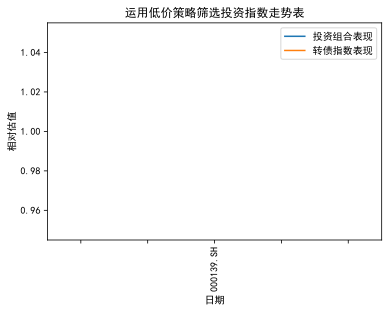

In [30]:
picture=relativecompare.plot()
plt.xlabel('日期')
plt.ylabel('相对估值')
plt.title('运用低价策略筛选投资指数走势表')
plt.legend()
plt.xticks(rotation=90) 

In [31]:
###将投资组合保存在excel表上
Data5.to_excel('运用低价策略筛选投资指数走势表.xlsx',sheet_name=strategy_build_data)

In [32]:
###将业绩对比图保存在fig图像
fig = picture.get_figure()
fig.savefig(strategy_build_data+'运行业绩对比结果.png')

In [33]:
###将figure图像插入到excel
Workbook = openpyxl.load_workbook(r"运用低价策略筛选投资指数走势表.xlsx")
Workbook.sheetnames


Worksheet=workbook.get_sheet_by_name("2019-07-01")


Worksheet.insert_image('B2',strategy_build_data+'运行业绩对比结果.png')
                       


['2020-03-30']

NameError: name 'workbook' is not defined

In [ ]:
writer = pd.ExcelWriter('运用低价策略筛选投资指数走势表.xlsx', engine='xlsxwriter')
sheet = writer.book.add_worksheet('test')


writer.book.add_worksheet('test')

worksheet.insert_image('B2', 'python.png')
sheet.insert_image(0,0,'foo.png')

In [37]:
w.wss("110033.SH", "close","tradeDate=20200330;priceAdj=U;cycle=D")

.ErrorCode=0
.Codes=[110033.SH]
.Fields=[CLOSE]
.Times=[20200330 23:05:05]
.Data=[[111.3241]]